In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras as kr
import sklearn
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

import itertools
import warnings
warnings.filterwarnings('ignore')

c:\Users\Nikita Ayu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:/Users/Nikita Ayu/BMKG/enso.csv", sep= ";")

In [3]:
df.head()

,SEAS,YR,MON,TOTAL,ANOM
0,DJF,1950,1,24.72,-1.53
1,JFM,1950,2,25.17,-1.34
2,FMA,1950,3,25.75,-1.16
3,MAM,1950,4,26.12,-1.18
4,AMJ,1950,5,26.32,-1.07


In [4]:
df.tail()

,SEAS,YR,MON,TOTAL,ANOM
879,MAM,2023,4,27.85,0.16
880,AMJ,2023,5,28.31,0.48
881,MJJ,2023,6,28.43,0.77
882,JJA,2023,7,28.36,1.07
883,JAS,2023,8,28.28,1.32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEAS    884 non-null    object 
 1   YR      884 non-null    int64  
 2   MON     884 non-null    int64  
 3   TOTAL   884 non-null    float64
 4   ANOM    884 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.7+ KB


In [6]:
df.describe()

,YR,MON,TOTAL,ANOM
count,884.000000,884.00000,884.000000,884.000000
mean,1986.334842,6.48190,26.891222,0.001007
std,21.278419,3.45046,0.938265,0.829835
min,1950.000000,1.00000,24.380000,-2.030000
25%,1968.000000,3.00000,26.220000,-0.572500
50%,1986.000000,6.00000,26.950000,-0.050000
75%,2005.000000,9.00000,27.530000,0.522500
max,2023.000000,12.00000,29.260000,2.640000


In [7]:
df.isnull().sum()

SEAS     0
YR       0
MON      0
TOTAL    0
ANOM     0
dtype: int64

In [8]:
df['DateTime'] = pd.to_datetime(df.YR.map(str) + '-' + df.MON.map(str))
df = df.set_index(['DateTime']) 

In [9]:
df.head()

,SEAS,YR,MON,TOTAL,ANOM
DateTime,,,,,
1950-01-01,DJF,1950,1,24.72,-1.53
1950-02-01,JFM,1950,2,25.17,-1.34
1950-03-01,FMA,1950,3,25.75,-1.16
1950-04-01,MAM,1950,4,26.12,-1.18
1950-05-01,AMJ,1950,5,26.32,-1.07


In [10]:
df = df.drop(['SEAS','YR','MON','TOTAL'], axis=1)
df.head()

,ANOM
DateTime,
1950-01-01,-1.53
1950-02-01,-1.34
1950-03-01,-1.16
1950-04-01,-1.18
1950-05-01,-1.07


In [11]:
df.shape

(884, 1)

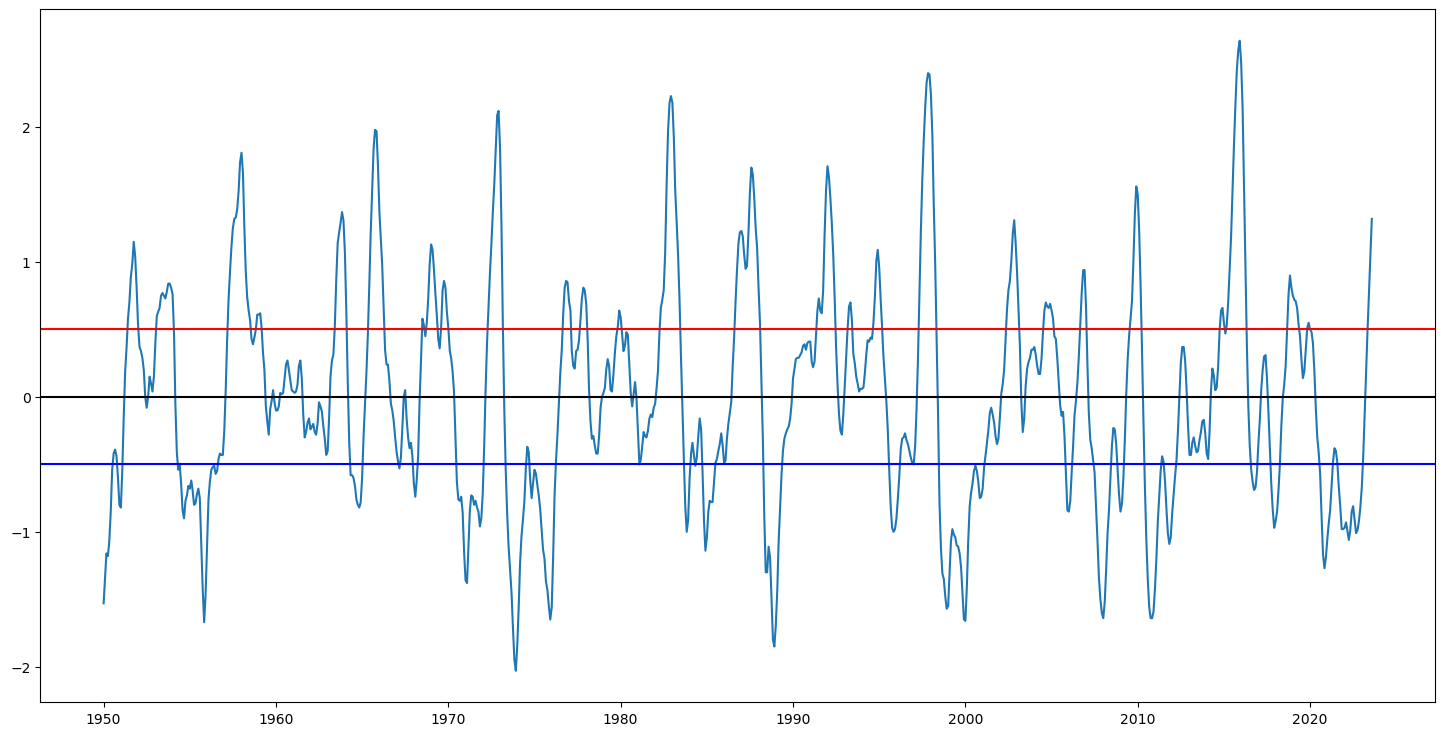

In [12]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["ANOM"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.axhline(y=0.5, color='red')
plt.axhline(y=0, color='black')
plt.axhline(y=-0.5, color='blue')
plt.show()

In [13]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
enso_values = scaler.fit_transform(df)

In [15]:
train_size = int(len(enso_values) * 0.80)
test_size = len(enso_values) - train_size
train, test = enso_values[0:train_size, :], enso_values[train_size:len(enso_values), :]

In [16]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
706/706 - 10s - loss: 0.0223 - 10s/epoch - 14ms/step
Epoch 2/100
706/706 - 3s - loss: 0.0025 - 3s/epoch - 4ms/step
Epoch 3/100
706/706 - 4s - loss: 0.0018 - 4s/epoch - 5ms/step
Epoch 4/100
706/706 - 3s - loss: 0.0019 - 3s/epoch - 4ms/step
Epoch 5/100
706/706 - 3s - loss: 0.0019 - 3s/epoch - 5ms/step
Epoch 6/100
706/706 - 3s - loss: 0.0019 - 3s/epoch - 5ms/step
Epoch 7/100
706/706 - 3s - loss: 0.0019 - 3s/epoch - 5ms/step
Epoch 8/100
706/706 - 4s - loss: 0.0019 - 4s/epoch - 5ms/step
Epoch 9/100
706/706 - 4s - loss: 0.0019 - 4s/epoch - 5ms/step
Epoch 10/100
706/706 - 4s - loss: 0.0019 - 4s/epoch - 6ms/step
Epoch 11/100
706/706 - 4s - loss: 0.0018 - 4s/epoch - 5ms/step
Epoch 12/100
706/706 - 4s - loss: 0.0018 - 4s/epoch - 6ms/step
Epoch 13/100
706/706 - 4s - loss: 0.0018 - 4s/epoch - 5ms/step
Epoch 14/100
706/706 - 3s - loss: 0.0019 - 3s/epoch - 4ms/step
Epoch 15/100
706/706 - 2s - loss: 0.0019 - 2s/epoch - 3ms/step
Epoch 16/100
706/706 - 2s - loss: 0.0018 - 2s/epoch - 3ms/ste

In [20]:
testPredict = model.predict(testX)

6/6 [==============================] - 2s 5ms/step


In [21]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [22]:
rmse = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('RMSE: %.2f' % rmse)

RMSE: 0.21


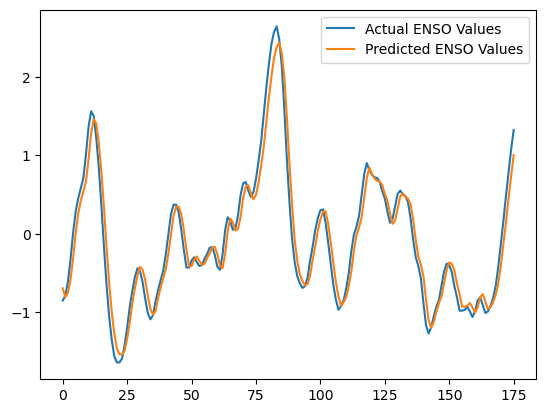

In [23]:
plt.plot(testY[0], label='Actual ENSO Values')
plt.plot(testPredict[:,0], label='Predicted ENSO Values')
plt.legend()
plt.show()